In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/nour/OneDrive/Documents/STAT 5243/project 1/cleaned_dataframe_project1.csv')
df.head(5)

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [2]:
import ast
import json
df['cleaned_tokens'] = df['cleaned_tokens'].apply(lambda x: ast.literal_eval(x))

In [3]:
##what are some common words of each school?
import numpy as np


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nour\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora.dictionary import Dictionary
dict_ = Dictionary(df['cleaned_tokens'])
print(dict_)
doc_term_matrix = [dict_.doc2bow(i) for i in df['cleaned_tokens']]
doc_term_matrix[0]

Dictionary(90083 unique tokens: ['archon', 'court', 'haunts', 'king', 'leave']...)


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [8]:
LdaModel = gensim.models.ldamodel.LdaModel
lda = LdaModel(doc_term_matrix, id2word=dict_, num_topics=5) 
lda.print_topics()


[(0,
  '0.012*"life" + 0.011*"love" + 0.008*"labour" + 0.007*"good" + 0.007*"mother" + 0.006*"great" + 0.006*"self" + 0.006*"husband" + 0.005*"people" + 0.005*"child"'),
 (1,
  '0.016*"world" + 0.010*"whole" + 0.009*"part" + 0.008*"god" + 0.007*"real" + 0.007*"class" + 0.007*"quantity" + 0.006*"hand" + 0.006*"existence" + 0.006*"nature"'),
 (2,
  '0.011*"price" + 0.007*"wages" + 0.007*"produce" + 0.006*"working" + 0.006*"trade" + 0.005*"right" + 0.004*"political" + 0.004*"know" + 0.004*"value" + 0.004*"moral"'),
 (3,
  '0.010*"work" + 0.008*"money" + 0.007*"value" + 0.007*"society" + 0.007*"home" + 0.007*"time" + 0.006*"interest" + 0.005*"social" + 0.005*"rate" + 0.005*"marriage"'),
 (4,
  '0.011*"capital" + 0.009*"movement" + 0.007*"sometimes" + 0.006*"alone" + 0.005*"means" + 0.005*"employment" + 0.005*"eyes" + 0.005*"time" + 0.005*"situation" + 0.005*"idea"')]

We see the themes outputted by the LDA model are relation to others, macros, political power, social power, and miscellaneous

In [17]:
from gensim.test.utils import datapath

# Save model to disk.
temp_file = datapath("C:/Users/nour/OneDrive/lda_model")
lda.save(temp_file)

# Load a potentially pretrained model from disk.
lda_new = LdaModel.load(temp_file)

[(0,
  '0.012*"life" + 0.011*"love" + 0.008*"labour" + 0.007*"good" + 0.007*"mother" + 0.006*"great" + 0.006*"self" + 0.006*"husband" + 0.005*"people" + 0.005*"child"'),
 (1,
  '0.016*"world" + 0.010*"whole" + 0.009*"part" + 0.008*"god" + 0.007*"real" + 0.007*"class" + 0.007*"quantity" + 0.006*"hand" + 0.006*"existence" + 0.006*"nature"'),
 (2,
  '0.011*"price" + 0.007*"wages" + 0.007*"produce" + 0.006*"working" + 0.006*"trade" + 0.005*"right" + 0.004*"political" + 0.004*"know" + 0.004*"value" + 0.004*"moral"'),
 (3,
  '0.010*"work" + 0.008*"money" + 0.007*"value" + 0.007*"society" + 0.007*"home" + 0.007*"time" + 0.006*"interest" + 0.005*"social" + 0.005*"rate" + 0.005*"marriage"'),
 (4,
  '0.011*"capital" + 0.009*"movement" + 0.007*"sometimes" + 0.006*"alone" + 0.005*"means" + 0.005*"employment" + 0.005*"eyes" + 0.005*"time" + 0.005*"situation" + 0.005*"idea"')]

In [18]:
schools = ['analytic', 'aristotle', 'capitalism', 'communism', 'continental',
       'empiricism', 'feminism', 'german_idealism', 'nietzsche',
       'phenomenology', 'plato', 'rationalism', 'stoicism']
for i in range(len(schools)):
    print(schools[i])
    lis1 = [w for w in df1['tokenized_txt'][i] if w.lower() not in stop_words]
    doc1 = [dict_.doc2bow(i) for i in  [lis1]]
    for i in lda[doc1]:
        print(i)

analytic
[(0, 0.12186527), (1, 0.20126438), (2, 0.2336691), (3, 0.17552911), (4, 0.26767212)]
aristotle
[(0, 0.2263297), (1, 0.25997508), (2, 0.13161749), (3, 0.18073083), (4, 0.20134695)]
capitalism
[(0, 0.22716591), (1, 0.16454442), (2, 0.17863812), (3, 0.2987271), (4, 0.13092446)]
communism
[(0, 0.2200462), (1, 0.18576872), (2, 0.17507005), (3, 0.26670557), (4, 0.15240946)]
continental
[(0, 0.2014694), (1, 0.21866909), (2, 0.17298625), (3, 0.19473085), (4, 0.21214442)]
empiricism
[(0, 0.18274696), (1, 0.20615858), (2, 0.20629033), (3, 0.21247622), (4, 0.19232792)]
feminism
[(0, 0.3132471), (1, 0.1622569), (2, 0.16779964), (3, 0.20843181), (4, 0.14826451)]
german_idealism
[(0, 0.1569771), (1, 0.24643052), (2, 0.17268874), (3, 0.18437251), (4, 0.23953116)]
nietzsche
[(0, 0.32511503), (1, 0.16492757), (2, 0.15912215), (3, 0.16682577), (4, 0.18400954)]
phenomenology
[(0, 0.1398344), (1, 0.2755116), (2, 0.1854099), (3, 0.18286487), (4, 0.2163792)]
plato
[(0, 0.2711777), (1, 0.15299033), 

This tells us where each of the schools placed in terms of the themes outputted by the LDA model

In [ ]:
###https://www.kaggle.com/code/yhuan95/word-frequency-time-series-in-news-headlines/notebook
###https://radimrehurek.com/gensim/models/ldamodel.html
###https://www.analyticsvidhya.com/blog/2021/06/part-3-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/
###https://www.projectpro.io/recipes/save-and-load-lda-model-gensim
###https://www.geeksforgeeks.org/generating-word-cloud-python/

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


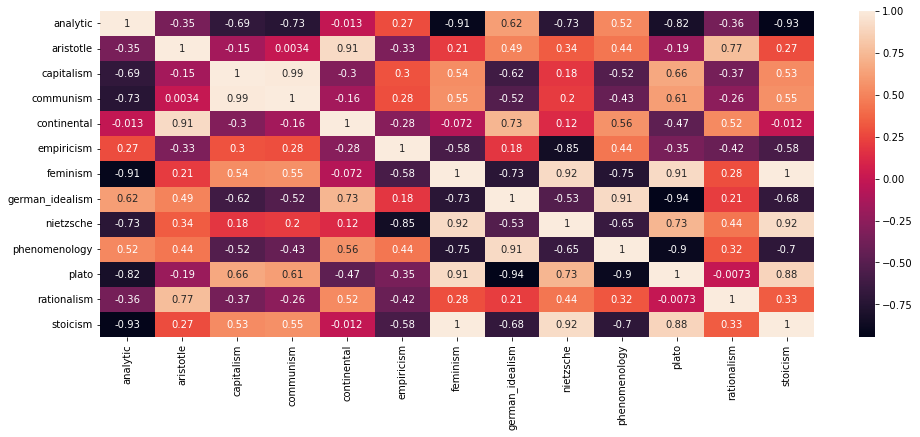

In [28]:
cor_vectors = {
    'analytic': [0.12186527,  0.20126438, 0.2336691, 0.17552911, 0.26767212],
    'aristotle': [ 0.2263297, 0.25997508,  0.13161749,  0.18073083,  0.20134695],
    'capitalism': [ 0.22716591, 0.16454442, 0.17863812, 0.2987271, 0.13092446],
    'communism': [0.2200462, 0.18576872, 0.17507005, 0.26670557, 0.15240946],
    'continental':[0.2014694, 0.21866909, 0.17298625, 0.19473085, 0.21214442],
    'empiricism':[ 0.18274696, 0.20615858, 0.20629033, 0.21247622, 0.19232792],
    'feminism':[0.3132471,  0.1622569, 0.16779964,  0.20843181, 0.14826451],
    'german_idealism': [ 0.1569771, 0.24643052, 0.17268874, 0.18437251, 0.23953116],
    'nietzsche': [0.32511503, 0.16492757, 0.15912215, 0.16682577, 0.18400954],
    'phenomenology': [0.1398344, 0.2755116, 0.1854099, 0.18286487, 0.2163792],
    'plato': [0.2711777, 0.15299033, 0.20769304, 0.21836437, 0.14977454],
    'rationalism':[0.23027557, 0.24575762, 0.18368725, 0.1572546, 0.18302499],
    'stoicism': [ 0.35262093,  0.16009544, 0.14953679, 0.20955318, 0.12819365]
}
cor_vectors=pd.DataFrame(cor_vectors)
plt.figure(figsize=(16, 6))
sns.heatmap(cor_vectors.corr(), annot=True);


This graph tells us how correlated or similar the schools are to each other.